In [3]:
import sys
sys.path.insert(0, '../src')
pickleFolder = '../PickledData/'
pickleFile = 'preProcessedData.p'
import file_operations



(restaurantTrainDict,restaurantTestDict,laptopTrainDict, laptopTestDict)\
    = file_operations.loadAndGetRawDataFromPickle(pickleFolder, pickleFile)
rst_train_sentences = restaurantTrainDict['sentences']['sentence']
lptp_train_sentences = laptopTrainDict['sentences']['sentence']

rst_all_asp = {}
lptp_all_asp = {}
def put_word2dict(aspects, word):
    word = word.lower()
    if word in aspects:
        aspects[word] += 1
    else:
        aspects[word] = 1

def get_aspects(sent):
    ret = []
    if 'aspectTerms' in sent:
        aspects = sent['aspectTerms']
        aspects = aspects['aspectTerm']
        if type(aspects) == list:
            for asp in aspects:
                ret.append(asp['@term'])
        else:
            aspect_word = aspects['@term']
            ret.append(aspect_word)
    else:
        # print(sent)
        pass
    return ret
for sent in rst_train_sentences:
    aspects = get_aspects(sent)
    for a in aspects:
        put_word2dict(rst_all_asp, a)

for sent in lptp_train_sentences:
    aspects = get_aspects(sent)
    for a in aspects:
        put_word2dict(lptp_all_asp, a)


all data loaded in python dicts


In [5]:
len(rst_all_asp)

1219

<Container object of 1219 artists>

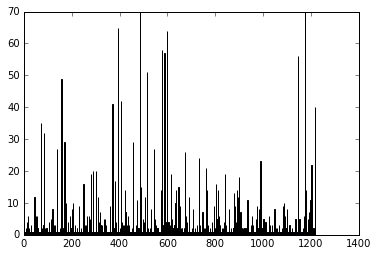

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

rst_asp_freq = []

for word in rst_all_asp:
    rst_asp_freq.append(rst_all_asp[word])

bar_width = 0.2
index = np.arange(len(rst_asp_freq))
axes = plt.gca()
axes.set_ylim([0, 70])
plt.bar(index, rst_asp_freq, color='b')

<Container object of 959 artists>

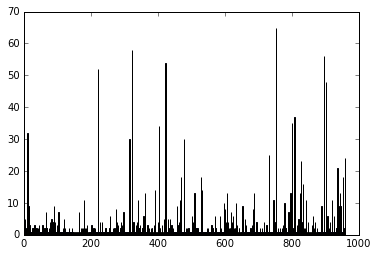

In [18]:
lptp_asp_freq = []
for word in lptp_all_asp:
    lptp_asp_freq.append(lptp_all_asp[word])
index2 = np.arange(len(lptp_asp_freq))
plt.bar(index2, lptp_asp_freq)